The objective in this excersize is analyze a dataset by performing PCA and linear regression.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Complete the relevant code after the corresponding cells.

Then upload the notebook to elearn.

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load the california housing dataset

In [ ]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
print(df.columns)
data = df.to_numpy()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


Visualize the data e.g. *correlation matrices*, *scatterplots*, something else


In [ ]:
data = df.to_numpy()

correlation_matrix = df.corr()
#print("Correlation matrix:\n", correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#Scatter Plot
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns[:3]):  # Only plotting the first 3 features for demonstration
    plt.subplot(1, 3, i+1)
    x = df[col]
    y = df['MedHouseVal']
    plt.scatter(x, y, marker='o')
    plt.title(col + ' and MedHouseVal')
    plt.xlabel(col)
    plt.ylabel('MedHouseVal')
plt.tight_layout()
plt.show()

# Advanced Visualizations
sns.pairplot(df[['MedHouseVal', 'MedInc', 'HouseAge']])
plt.show()


split the data to training (80%) and test (20%) sets
and standarize the features if necessary

In [ ]:
#Ignore this one

perform PCA to reduce the number of features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('MedHouseVal', axis=1))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['MedHouseVal'] = df['MedHouseVal']

# Display the DataFrame with PCA components
print("DataFrame with PCA components:")
print(df_pca.head())

DataFrame with PCA components:
        PC1       PC2  MedHouseVal
0  1.882704 -0.503362        4.526
1  1.371120 -0.121406        3.585
2  2.086868 -0.501136        3.521
3  1.575801 -1.239495        3.413
4  1.591206 -1.345264        3.422


provide scatterplots for the case of projections in 2 and 3 dimensions

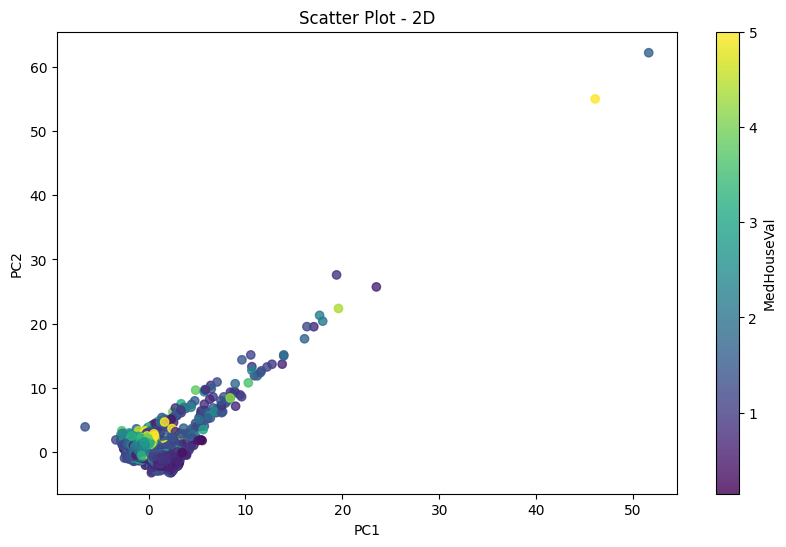

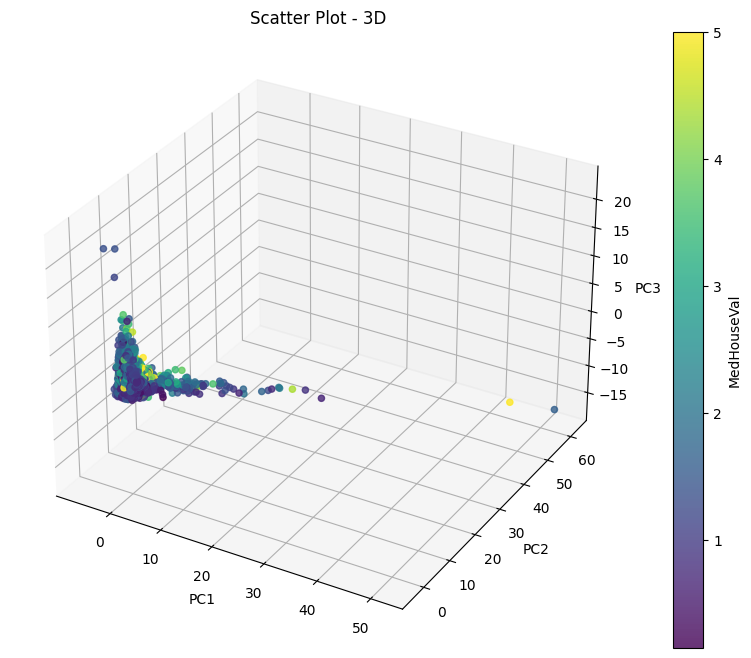

In [ ]:
# Scatter Plot for 2D PCA
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['MedHouseVal'], cmap='viridis', alpha=0.8)
plt.title('Scatter Plot - 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='MedHouseVal')
plt.show()

# Perform PCA to reduce the number of features (3D)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create a DataFrame with 3D PCA components
df_pca_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['MedHouseVal'] = df['MedHouseVal']

# Scatter Plot for 3D PCA
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['MedHouseVal'], cmap='viridis', alpha=0.8)
ax.set_title('Scatter Plot - 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(scatter, label='MedHouseVal')
plt.show()



perform linear regression using the original features

In [ ]:
# Separate features and target variable
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the entire dataset
linear_reg_model.fit(X, y)

# Make predictions on the entire dataset
y_pred = linear_reg_model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)

# Display the model's performance metrics
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.5243209861846072


perform linear regression using PCA-reduced features

In [ ]:
# Perform PCA to reduce the number of features
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Initialize the Linear Regression model
linear_reg_model_pca = LinearRegression()

# Train the model on the PCA-reduced features
linear_reg_model_pca.fit(X_pca, y)

# Make predictions on the entire dataset using PCA-reduced features
y_pred_pca = linear_reg_model_pca.predict(X_pca)

# Evaluate the model
mse_pca = mean_squared_error(y, y_pred_pca)

# Display the model's performance metrics with PCA
print("Mean Squared Error (MSE) with PCA:", mse_pca)

Mean Squared Error (MSE) with PCA: 1.2949926378947951


Compare the perfornance of linear regression on the original vs the PCA features

In [ ]:
print("Linear Regression on Original Features:")
print("Mean Squared Error (MSE):", mse)
print("\nLinear Regression on PCA-reduced Features:")
print("Mean Squared Error (MSE) with PCA:", mse_pca)




Linear Regression on Original Features:
Mean Squared Error (MSE): 0.5243209861846072

Linear Regression on PCA-reduced Features:
Mean Squared Error (MSE) with PCA: 1.2949926378947951


Quantify the impact of the number of principal components on the regression
?

In [ ]:
num_components_list = [1, 2, 3, 4, 5]
for num_components in num_components_list:
    # Perform PCA to reduce the number of features
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X_scaled)

    # Initialize the Linear Regression model on PCA-reduced features
    linear_reg_model_pca = LinearRegression()
    linear_reg_model_pca.fit(X_pca, y)
    y_pred_pca = linear_reg_model_pca.predict(X_pca)

    # Evaluate the model on PCA-reduced features
    mse_pca = mean_squared_error(y, y_pred_pca)

    # Display the results
    print(f"Number of Components: {num_components}")
    print("Mean Squared Error (MSE) with PCA:", mse_pca)

Number of Components: 1
Mean Squared Error (MSE) with PCA: 1.3299439787512726
Number of Components: 2
Mean Squared Error (MSE) with PCA: 1.2949926378947951
Number of Components: 3
Mean Squared Error (MSE) with PCA: 1.2929760346153332
Number of Components: 4
Mean Squared Error (MSE) with PCA: 0.726286709827364
Number of Components: 5
Mean Squared Error (MSE) with PCA: 0.7262716778219084
